# Scikit-Learn 机器学习介绍

参考链接：
- [Scikit-Learn机器学习介绍（中文翻译）](http://www.tuicool.com/articles/qeIzI3F)
- [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

机器学习（machine learning）：
- 监督式（supervised）：数据中包括了我们想预测的属性
    - 分类（classification）：样本属于两个或多个类别，我们希望通过从已标记类别的数据学习，来预测未标记数据的分类
    - 回归（regression）：如果希望的输出是一个或多个连续的变量，那么这项任务被称作回归
- 非监督式（unsupervised）：训练数据包括了输入向量X的集合，但没有相对应的目标变量
    - 聚类（Clustering）：发掘数据中相似样本的分组
    - 密度估计（density estimation）：确定输入样本空间中的数据分布
    - 降维（dimensionality reduction）：将数据从高维空间投射到两维或三维空间，以便进行数据可视化

In [1]:
%pylab inline

import numpy as np
import sklearn
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


## 加载样例数据集

In [2]:
# load dataset
iris = datasets.load_iris()
digits = datasets.load_digits()

## 样本描述
print digits.DESCR

In [3]:
# 数据被存储在.data成员内，是一个n_samples*n_features的数组
print digits.data

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [4]:
# 在有监督问题的情形下，一个或多个因变量（response variables）被储存在.target成员中
print digits.target

[0 1 2 ..., 8 9 8]


## 学习和预测

In [5]:
# 匹配一个 预测器 (estimator)来 预测 (predict)未知样本所属的分类
from sklearn import svm

# 例子里我们手动设置了gamma值。可以通过这些工具例如 网格搜索 （grid search）和 交叉验证 （cross validation）来自动找到参数的最佳取值
clf = svm.SVC(gamma=0.001, C=100.)

In [6]:
# 给预测器取个名字叫做clf（claasifier）。现在预测器必须来 匹配 （fit）模型，也就是说，它必须从模型中 学习 （learn）。
# 将除了最后一个样本的数据全部作为训练集
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# 询问分类器，digits数据集里最后一个图案所代表的数字是什么
clf.predict([digits.data[-1]])

array([8])

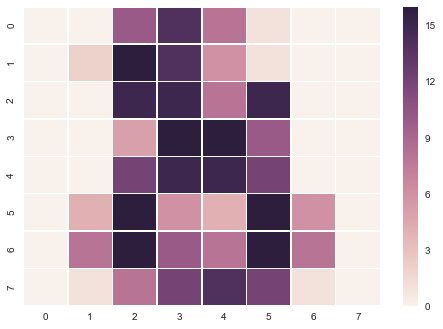

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

df = pd.DataFrame(np.array(digits.data[-1]).reshape((8,8)))
sns.heatmap(df, fmt="d", linewidths=.5)

## 模型持久性（Model persistence）

In [9]:
from sklearn.externals import joblib

# 保存scikit的模型
joblib.dump(clf, 'clf.pkl')

# 重新加载pickled模型
clf2 = joblib.load('clf.pkl')

# 验证模型
clf2.predict([digits.data[-1]])

array([8])

In [10]:
# 清除实验中间产物
!rm -f clf.pkl

## 约定习惯

### 自动转型

如果没有特别定义，输入会被自动转型成 float64

In [11]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = np.array(rng.rand(10, 2000), dtype='float32')

transformer = random_projection.GaussianRandomProjection()
Y = transformer.fit_transform(X)

print X.dtype, Y.dtype

float32 float64


In [12]:
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
clf = SVC()

# fit with iris.target，预测结果为 integer
clf.fit(iris.data, iris.target)
print list(clf.predict(iris.data[:3]))

# fit with iris.target_names, 预测结果为 string
clf.fit(iris.data, iris.target_names[iris.target])
print list(clf.predict(iris.data[:3]))

[0, 0, 0]
['setosa', 'setosa', 'setosa']


### 重新匹配 与 更新参数

In [13]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()

# the default kernel is rbf
clf.fit(X, y)
print list(clf.predict(X_test))

# change the kernel to linear
clf.set_params(kernel='linear').fit(X, y)  
print list(clf.predict(X_test))

# change the kernel back to rbf
clf.set_params(kernel='rbf').fit(X, y)  
print list(clf.predict(X_test))

[0, 0, 0, 1, 0]
[1, 0, 1, 1, 0]
[0, 0, 0, 1, 0]


### 多类别（multiclass） vs. 多标签（multilabel） 匹配

In [14]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))

In [15]:
# 多类别分类匹配一维数组，返回多类别预测值
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [16]:
# LabelBinarizer 转换一维数组为二维数组
y = LabelBinarizer().fit_transform(y)

# 标签分类匹配二维数组，返回多标签预测值
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

- 第四、五个返回全为0，表示三个标签都不匹配。（可能多于两个标签匹配）

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]

# MultiLabelBinarizer 转换二维数组为二维标签数组
y = MultiLabelBinarizer().fit_transform(y)

# 多标签分类匹配二维数组，返回多标签预测值
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])